# Innomatics Research Lab - Hackathon

Firstly import the packages and modules needed for the data preprocessing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read the given dataframe (CSV file) with pandas.

In [2]:
df = pd.read_csv("dataframe.csv")

Lets see some of the data from the dataframe.

In [3]:
df.head(10)

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
5,-134.366669,-116.000000
6,-115.563739,-126.267621
7,-132.080161,-132.032206
8,-133.366669,-114.000000
9,-119.524112,-94.419855


`info()` method describes the data abouut the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


Let's check for the null values in the dataframe.

In [5]:
df.isna().sum()

input     1
output    1
dtype: int64

There a null values in both the `input` and `output` columns. Let's drop those rows with NaN values.

In [6]:
df = df.dropna()

Let's check again for the presence of NaN values in the dataframe.

In [7]:
df.isna().sum()

input     0
output    0
dtype: int64

There are no NaN valued rows present in the dataframe.

The total number of the values present in the dataframe are :

In [8]:
df.value_counts().sum()

1696

Lets check the datatype of the values in the dataframe.

In [9]:
df.dtypes

input     float64
output    float64
dtype: object

Both columns contains the `float64` type data.

## Linear Regression Model.

import `LinearRegression()` from sklearn.linear_model.

In [10]:
from sklearn import linear_model
model = linear_model.LinearRegression()

Split the data into the feature attributes and target values.

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop("output", axis=1)
Y = df.output

Splitting the data into tarining and testing sets. with `train_test_split()`

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Train the model with the traing data i.e, `X_train` and `Y_train`.

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

Predict the values for the testiing data with `X_test` using the `predict()` medthod.

In [14]:
Y_predict = model.predict(X_test)

Check the values of the Prediction by the model. (Converting the predicted values into a `DataFrame`, taking the first 10 values for the easy convention. )

In [15]:
pd.DataFrame(Y_predict[:10])

,0
0,-81.271242
1,-80.123124
2,-43.333916
3,-33.402090
4,-19.644565
5,-36.691037
6,-0.554905
7,-56.368572
8,-52.941697
9,0.387342


Check the score of thetrained model using `score()` method.

In [16]:
model.score(X_train, Y_train)

0.2497730808029599

The `LinearRegression()` model gives the score of the prediction to 26%. So it's better to check the `RidgeRegression()`.

## Ridge Regression

Import the `Ridge()` from sklearn.linear_model and train the model with the training and testing data.

In [17]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, Y_train)

Ridge()

Check the score of the Rige Regression model.

In [18]:
model.score(X_test, Y_test)

0.3076610990782739

The Ridge Regression model gave the score of 26 %, same as the Linear Regression model. For better trained model we need to use `RandomForestReggessor`.

# Random Forest Regression.

* Import the RandomForestRegressor model class from the ensemble module

* Institate and fit the model (on the training set)

* Check the score of the model (on the test set)

In [31]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(20)
model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.7023109853034111

Checking the cross value for the model improvement of accuracy.

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(model, X, Y)

array([0.8485175 , 0.87450373, 0.25545647, 0.06966697, 0.92360379])

The model performs with better accuracy when the test data is taken form the last 20% of the dataset with the highest score.

In [22]:
cross_val_score(model, X, Y, cv=5, scoring=None)

array([0.83410175, 0.87251563, 0.25420993, 0.07178901, 0.92390877])

Checking the other evaluation metrics with the model.

In [23]:
from sklearn.metrics import r2_score
y_test_mean = np.full(len(Y_test), Y_test.mean())
r2_score(Y_test, y_test_mean)

0.0

In [24]:
df = pd.DataFrame(data={"actual values": Y_test, 
                   "predictions": Y_predict})

# Plotting the predictions vs true values

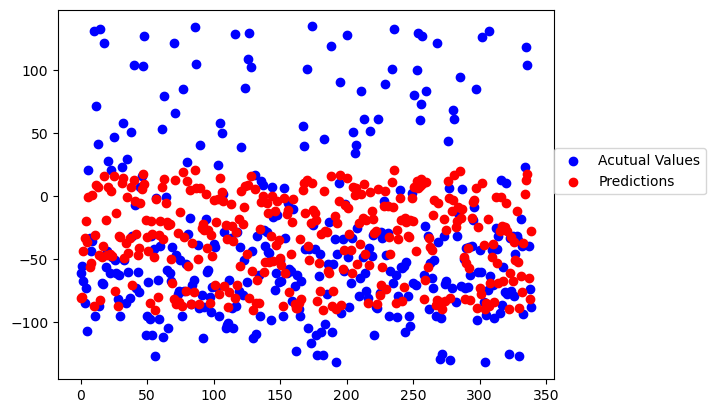

In [25]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [26]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_predict)
mse

3047.08886473699

# Saving the trained model

In [27]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))

# Loading the saved model

In [28]:
loaded_pickle_model = pickle.load(open("model.pkl", "rb"))

# Making predictions with the loaded model

In [29]:
# Make predictions and evaluate the loaded model
y_preds = loaded_pickle_model.predict(X_test)


In [30]:
pd.DataFrame(y_preds).head(10)

,0
0,-16.184558
1,-58.782130
2,-61.743337
3,-86.272416
4,-80.162259
5,-81.154242
6,1.754042
7,-37.982905
8,-44.463745
9,26.193122
